<a href="https://colab.research.google.com/github/joeljose/audio_denoising/blob/main/denoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

essential imports

In [ ]:
import scipy
from scipy.io import wavfile
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.signal import butter, lfilter
import cv2
import librosa
import soundfile as sf



helper functions

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



float32
(35200,)
16.0


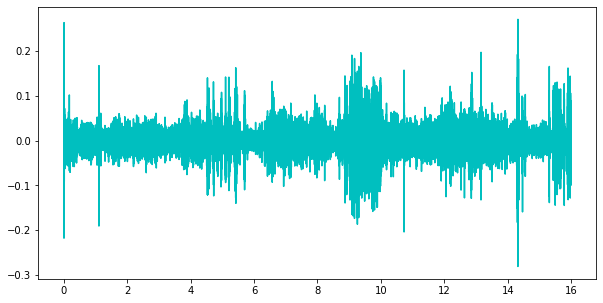

In [ ]:
# x,fs =librosa.load("full.wav",sr=None)
x,fs =librosa.load("noroll.wav",sr=None)
# x,fs =librosa.load("noroll.wav",sr=None)
print(x.dtype)
sf.write("try.wav",x,fs)
x=x[880:36080]
print(x.shape)

n=len(x)
dt=1/fs
tot_time=np.floor(n*dt)
print(tot_time)
t=np.arange(0,tot_time,dt)

# Plot the signal read from wav file

lowcut=150
highcut=500

# p = butter_highpass_filter(x, lowcut, fs, order=12)
p= butter_bandpass_filter(x,lowcut,highcut,fs,order=12)
# p=x

plt.rcParams['figure.figsize']=[10,5]
plt.rcParams.update({'font.size':10})
plt.plot(t,p,color='c',Linewidth=1.5,label="input")
plt.xlim=(t[0],t[-1])
plt.title('Audio signal')

plt.ylabel('Amplitude')

plt.xlabel('Time[sec]')
plt.savefig('rec_spec.png')


In [ ]:

Audio(x, rate=fs)

In [ ]:


sf.write('in.wav',p,fs)
Audio(p, rate=fs)

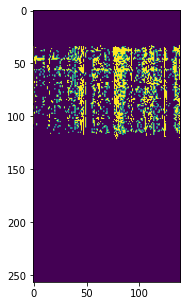

In [ ]:

nperseg = 512

f, ti, Zxx = signal.stft(p, fs=fs, nperseg=nperseg)
zmax=(np.max(np.abs(Zxx)))
temp=np.abs(Zxx)*(255/zmax)
thresh=20
temp1=np.where(temp>=thresh,1,0)

plt.imshow(temp1)






bool


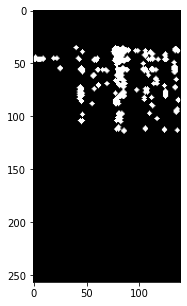

In [ ]:
new = scipy.ndimage.binary_erosion(temp1,iterations=1)
new = scipy.ndimage.binary_dilation(new,iterations=2)
# new = scipy.ndimage.binary_opening(img,iterations=1)
# new = scipy.ndimage.binary_erosion(img,iterations=1)
# new = scipy.ndimage.binary_dilation(new,iterations=2)
# new = scipy.ndimage.binary_erosion(img,iterations=1)
# new = scipy.ndimage.binary_dilation(new,iterations=1)
plt.imshow(new, cmap=plt.cm.gray)
# cv2.imwrite("out.png",np.float32(temp))
# orig=cv2.imread("out.png",0)
# img=np.copy(orig)
# thres=190
# img[img>thres]=255
# img[img<=thres]=0
# cv2.imwrite("thres.png",img)

print(new.dtype)
# plt.imshow(new, cmap=plt.cm.gray)
# orig[new==False]=0
# cv2.imwrite("thres1.png",np.float32(new))
# eroded_square = ndimage.binary_erosion(square)



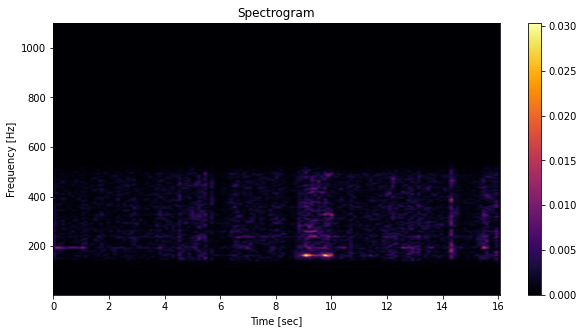

In [ ]:
cmap = plt.get_cmap('inferno')
plt.pcolormesh(ti, f, np.abs(Zxx), shading='gouraud',cmap=cmap)
# plt.pcolormesh(ti, f, orig, shading='gouraud')
plt.ylim([f[1], f[-1]])

plt.title('Spectrogram')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.colorbar()

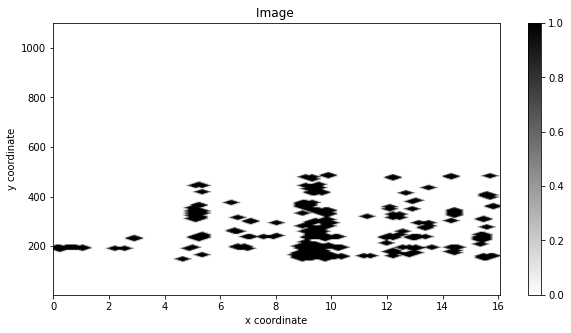

In [ ]:

# plt.pcolormesh(ti, f, np.abs(Zxx), shading='gouraud')
cmap = plt.get_cmap('binary')
plt.pcolormesh(ti, f, new, shading='gouraud',cmap=cmap)

plt.ylim([f[1], f[-1]])

plt.title('Image ')

plt.ylabel('y coordinate')

plt.xlabel('x coordinate')
plt.colorbar()
plt.savefig('morph.png')

In [ ]:
val=np.max(Zxx)
# Qxx=np.full_like(Zxx, val, dtype=np.float32)
amp=10
Rxx = np.where(new==1,Zxx*amp ,Zxx/amp)
# Rxx = np.where(new==1,val*amp,Zxx/amp)

_, xrec = signal.istft(Rxx, fs)

import soundfile as sf
sf.write('out.wav',xrec,fs)

Audio(xrec, rate=fs)


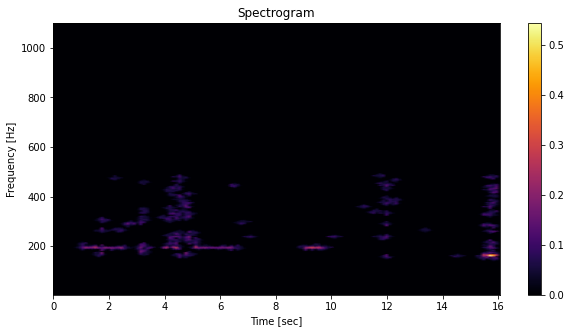

In [ ]:
# plt.pcolormesh(ti, f, np.abs(Rxx), shading='gouraud')
cmap = plt.get_cmap('inferno')
plt.pcolormesh(ti, f, np.abs(Rxx), shading='gouraud',cmap=cmap)
# plt.pcolormesh(ti, f, orig, shading='gouraud')
plt.ylim([f[1], f[-1]])

plt.title('Spectrogram')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.colorbar()
plt.savefig('rec_spec.png')

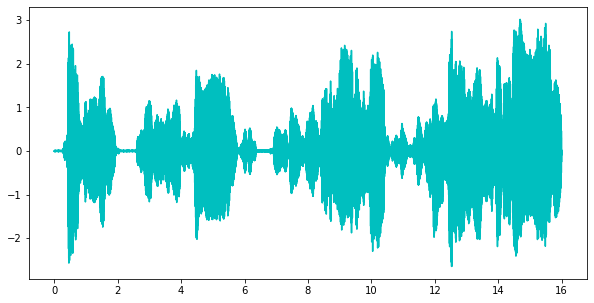

In [ ]:
xrec=xrec[:35200]
plt.rcParams['figure.figsize']=[10,5]
plt.rcParams.update({'font.size':10})
plt.plot(t,xrec,color='c',Linewidth=1.5,label="input")
plt.xlim=(t[0],t[-1])
plt.title('Audio signal')

plt.ylabel('Amplitude')

plt.xlabel('Time[sec]')
plt.savefig('final.png')